In [1]:
import pandas as pd
import quandl
import math
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import numpy as np
df = quandl.get("WIKI/GOOGL")
df.head(2)

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0


In [2]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0


df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

In [3]:
df.head(2)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414


In [4]:
forecast_out

35

In [7]:
x = np.array(df.drop(['label'], 1))
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]

df.dropna(inplace = True)
y = df['label']
y_lately = y[-forecast_out:]
y = y[:-forecast_out]
x.shape,x_lately.shape,y.shape,y_lately.shape

((3354, 4), (35, 4), (3354,), (35,))

In [8]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size = 0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2683, 4), (671, 4), (2683,), (671,))

In [9]:
clf = LinearRegression()
clf.fit(x_train,y_train)
confidence = clf.score(x_test,y_test)
print(confidence)

0.9751710192153549


In [10]:
forecast_set = clf.predict(x_lately)
forecast_set

array([1081.79169569, 1096.3108336 , 1109.74930254, 1104.51692955,
       1098.04609051, 1096.01866541, 1094.8143583 , 1090.76605245,
       1084.93523033, 1080.37634343, 1078.81573525, 1096.96663184,
       1115.59862406, 1121.27721574, 1136.00065718, 1140.31406028,
       1138.42672282, 1136.237952  , 1137.95621141, 1155.43865967,
       1154.78486172, 1164.6688611 , 1161.26486446, 1169.86132121,
       1189.41471906, 1203.07215203, 1196.42178857, 1208.84061153,
       1213.37479874, 1213.05469417, 1203.84069625, 1208.65930409,
       1207.52536007, 1142.81394877, 1085.23068986])

In [11]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
##'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn- <...> born-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test'

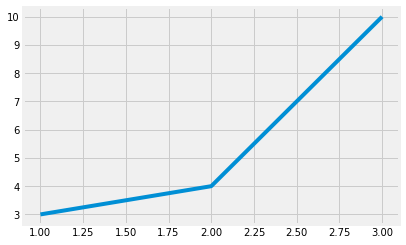

In [12]:
a = (1,2,3)
b = (3,4,10)
plt.plot(a,b)

In [13]:
df['Forecast'] = np.nan

In [14]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849,NaN


In [15]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
last_unix
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

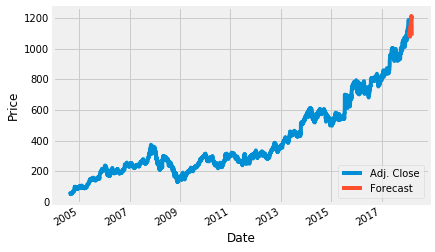

In [16]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()